In [1]:
import numpy as np
import pandas as pd
import emoji
import re
import jieba
import os
import pickle
from tqdm import tqdm
from collections import Counter

In [3]:
teatext_df = pd.read_csv('Text Classification/data/teapro.csv', encoding="utf-8")

In [5]:
print(teatext_df.shape)
print(teatext_df.columns)

(13949, 11)
Index(['no', 'displayUserNick', 'rateContent', 'rateDate', 'package',
       'quality', 'price', 'service', 'logistics', 'other', 'sentiment'],
      dtype='object')


no                   0
displayUserNick      1
rateContent        415
rateDate             1
package              1
quality              1
price                1
service              1
logistics            1
other                1
sentiment           36
dtype: int64


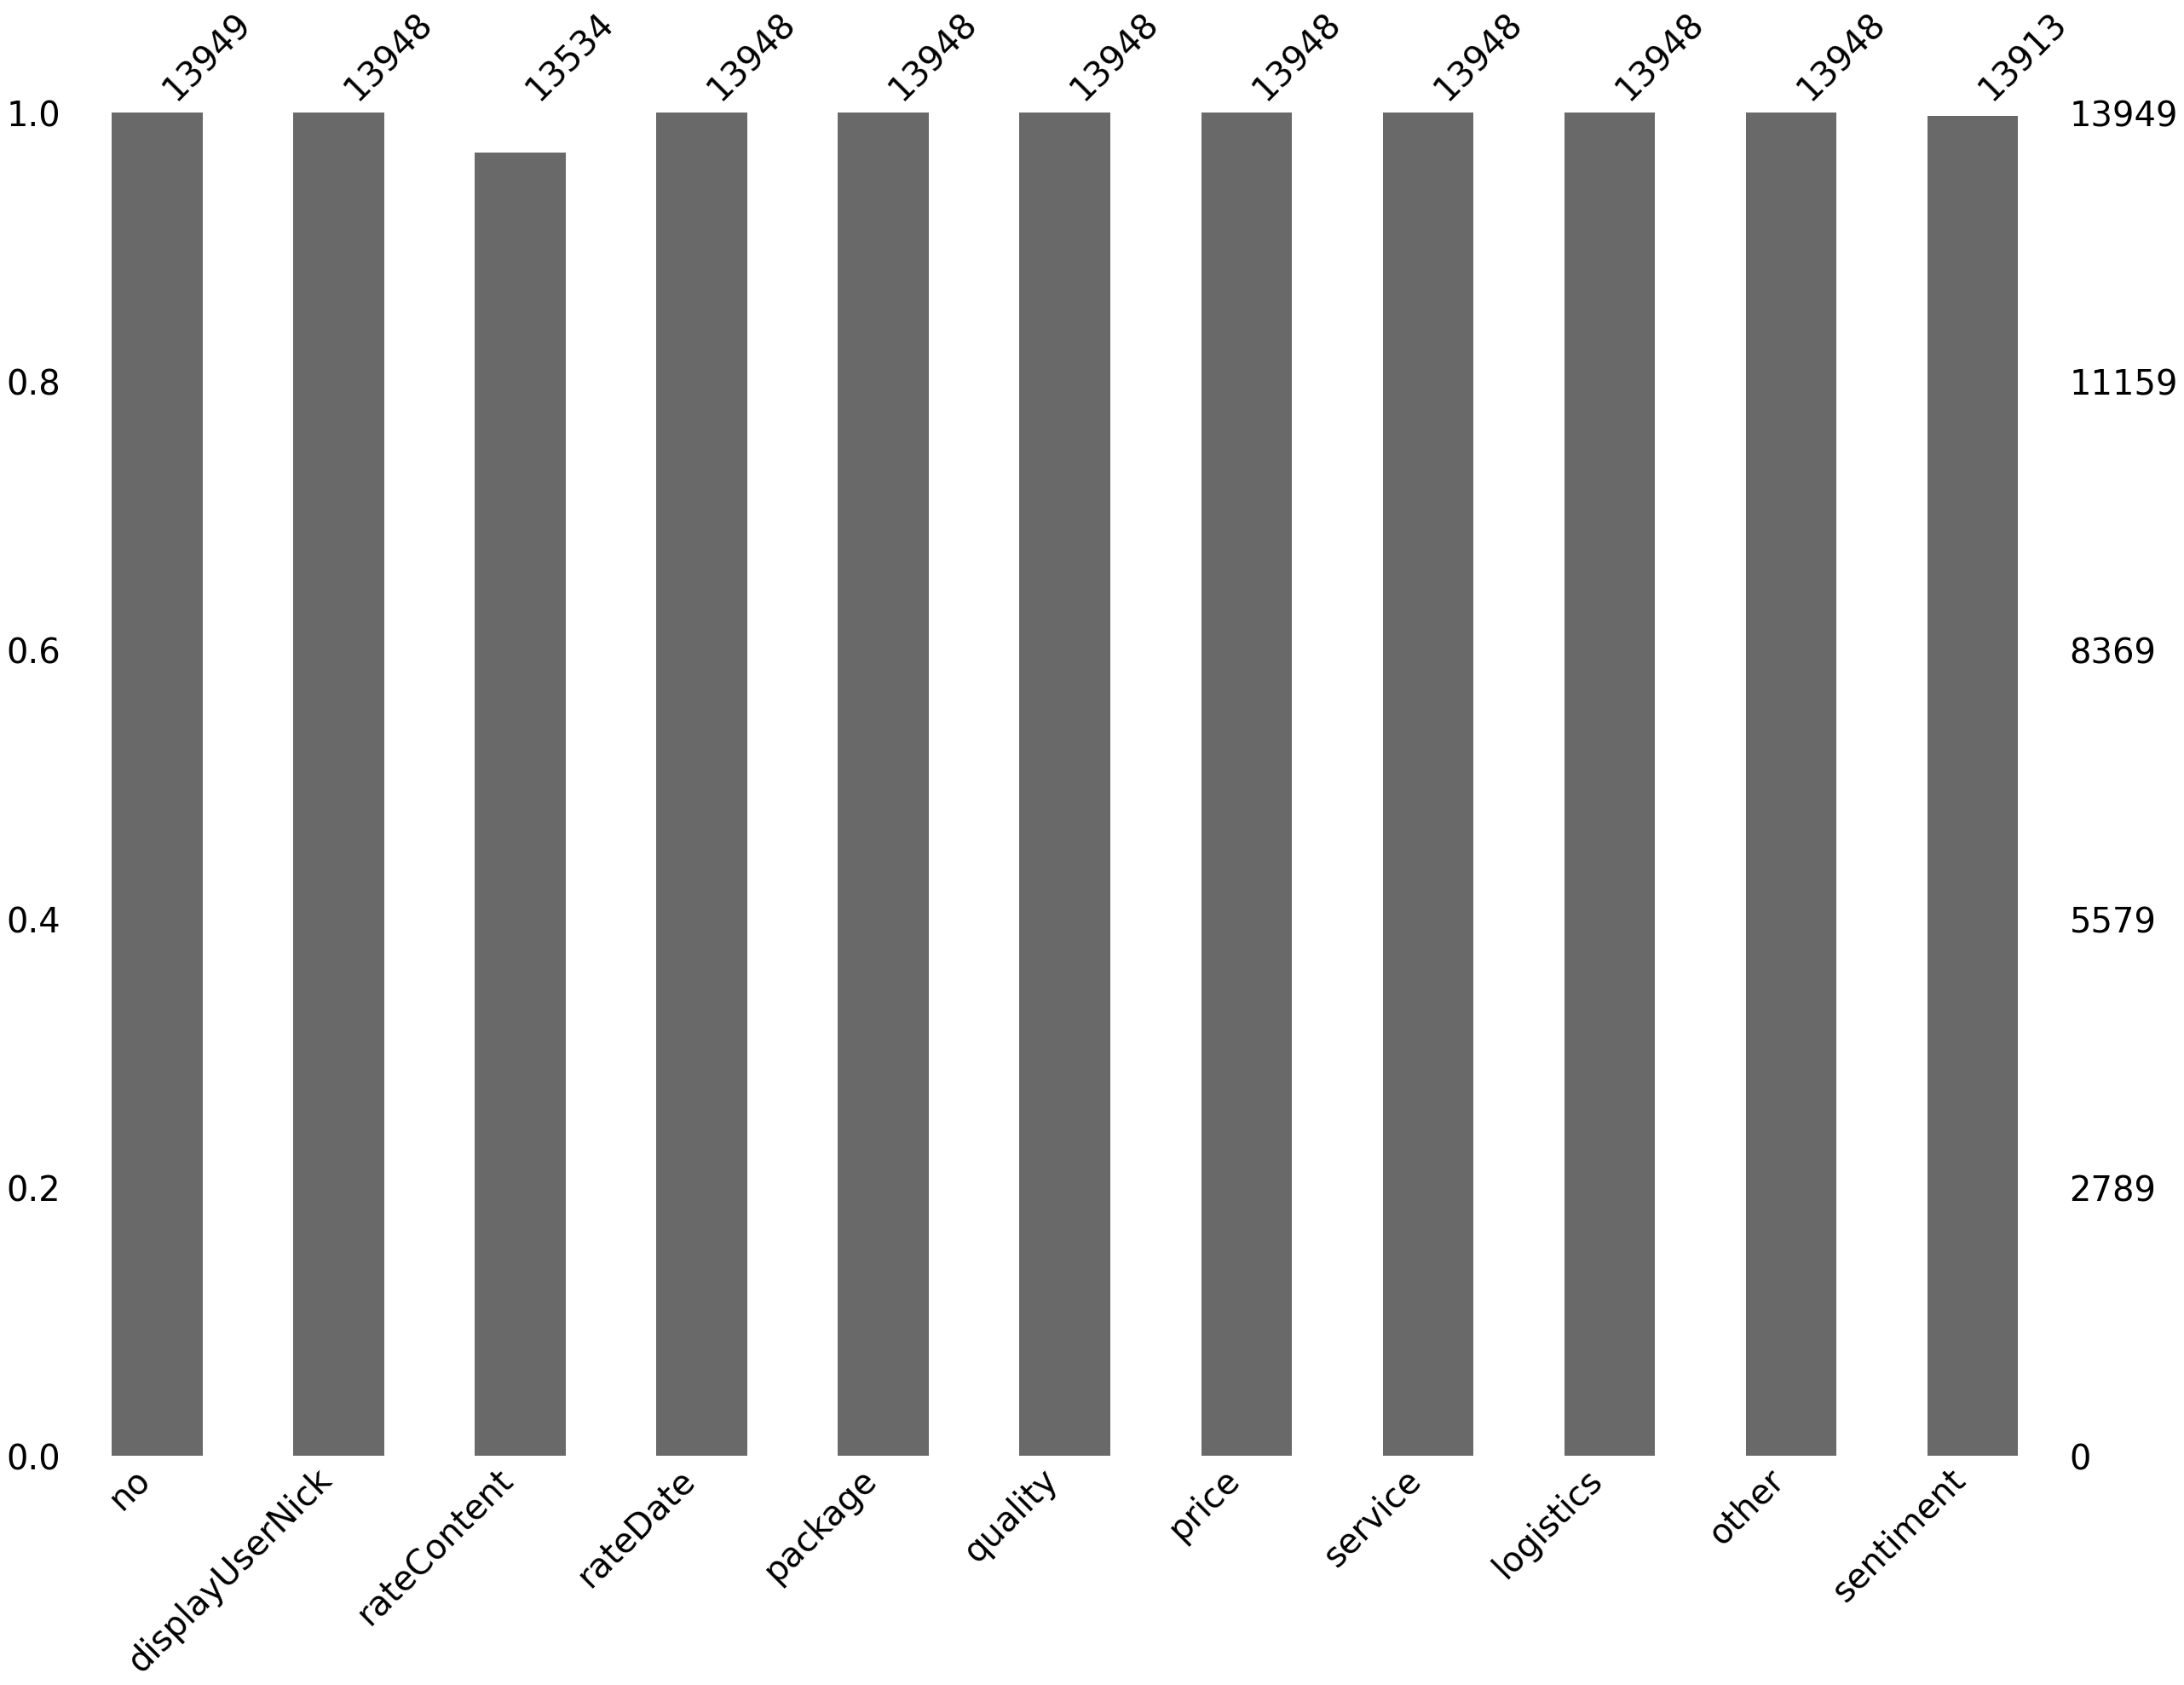

In [6]:
# 缺失值
import missingno as msno

print(teatext_df.isnull().sum())
fig = msno.bar(teatext_df, labels=True, figsize=(42, 29), fontsize=40).get_figure()

# 缺失值较少，可直接删除

<AxesSubplot:>

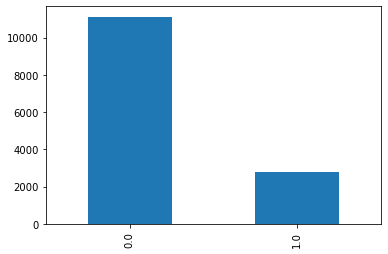

In [7]:
# 情感列（sentiment）值分布
teatext_df["sentiment"].value_counts().plot.bar()

<AxesSubplot:>

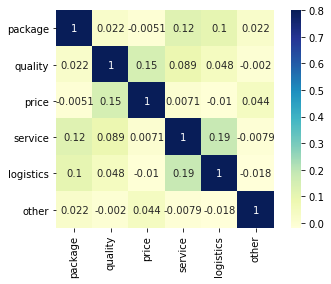

In [25]:
# 多标签相关性
import seaborn as sns
tmp = teatext_df.iloc[:,[4,5,6,7,8,9]]
sns.heatmap(tmp.corr("kendall"),
            vmax=.8, square=True, cmap='YlGnBu', annot=True)

<AxesSubplot:ylabel='Density'>

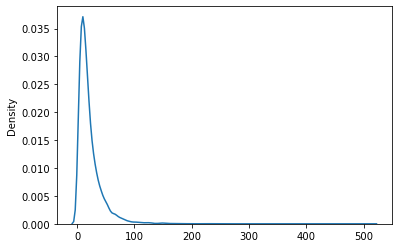

In [40]:
# 文本长度
tmp = [len(x) for x in list(teatext_df["rateContent"].dropna(axis=0))]
sns.kdeplot(tmp)

# 文本普遍长度普遍小于100